In [230]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import TfidfVectorizer
import ast
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score

In [80]:
# Load your dataset (adjust the filename/path as necessary)
df = pd.read_csv('../Data/Clean/Combined_Book_Data.csv')

In [84]:
df.head(3)

,Unnamed: 0,Good_Reads_Popularity_Rank,Title,Author,Avg_Rating,Num_Ratings,ISBN,ASIN,Genres,Series,Page_Number,Format
0,0,1.0,The Hunger Games,Suzanne Collins,4.34,9318770.0,9780439023481,0439023483,"Young Adult, Fiction, Fantasy, Science Fiction...","The Hunger Games, #1",374,Hardcover
1,1,2.0,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,3616863.0,Not found,0439686520,"Fantasy, Young Adult, Fiction, Magic, Audioboo...","Harry Potter, #5",912,Paperback
2,2,3.0,Pride and Prejudice,Jane Austen,4.29,4517843.0,9781441341709,1441341706,"Fiction, Historical Fiction, Historical, Liter...",NaN,279,Paperback


# Determine a Book Quality Score

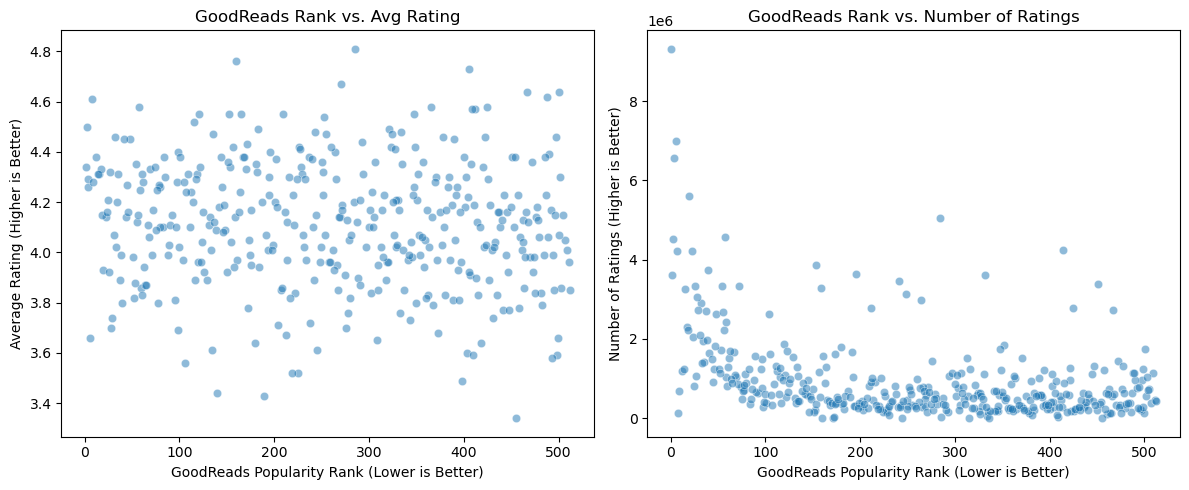

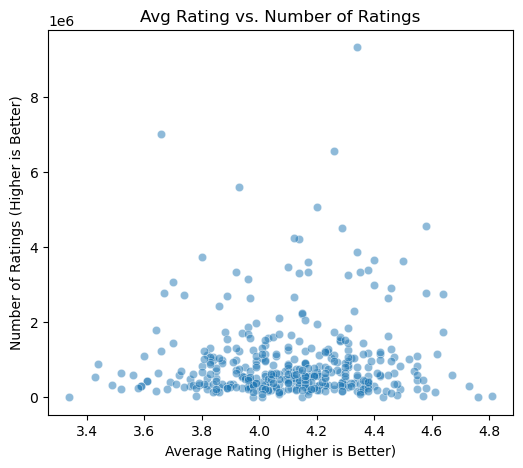

,Good_Reads_Popularity_Rank,Avg_Rating,Num_Ratings
Good_Reads_Popularity_Rank,1.000000,-0.100228,-0.399204
Avg_Rating,-0.100228,1.000000,0.058986
Num_Ratings,-0.399204,0.058986,1.000000


<Figure size 640x480 with 0 Axes>

In [249]:
# Analyze Good Reads Popularity Rank, Avg_Rating, and Number of Ratings
# Create scatter plots to visualize the relationships between these three metrics

plt.figure(figsize=(12, 5))

# Relationship between Popularity Rank and Avg Rating
plt.subplot(1, 2, 1)
sns.scatterplot(x=df["Good_Reads_Popularity_Rank"], y=df["Avg_Rating"], alpha=0.5)
plt.xlabel("GoodReads Popularity Rank (Lower is Better)")
plt.ylabel("Average Rating (Higher is Better)")
plt.title("GoodReads Rank vs. Avg Rating")
plt.savefig('../Presentation/GoodReads Rank vs. Avg Rating.png', dpi=300, bbox_inches='tight')

# Relationship between Popularity Rank and Number of Ratings
plt.subplot(1, 2, 2)
sns.scatterplot(x=df["Good_Reads_Popularity_Rank"], y=df["Num_Ratings"], alpha=0.5)
plt.xlabel("GoodReads Popularity Rank (Lower is Better)")
plt.ylabel("Number of Ratings (Higher is Better)")
plt.title("GoodReads Rank vs. Number of Ratings")
plt.savefig('../Presentation/GoodReads Rank vs. Number of Ratings.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

# Relationship between Avg Rating and Number of Ratings
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df["Avg_Rating"], y=df["Num_Ratings"], alpha=0.5)
plt.xlabel("Average Rating (Higher is Better)")
plt.ylabel("Number of Ratings (Higher is Better)")
plt.title("Avg Rating vs. Number of Ratings")
plt.show()
plt.savefig('../Presentation/Avg Rating vs. Number of Ratings.png', dpi=300, bbox_inches='tight')

# Check correlations between the three variables
correlation_matrix = df[["Good_Reads_Popularity_Rank", "Avg_Rating", "Num_Ratings"]].corr()
correlation_matrix


**Analysis**


*GoodReads Popularity Rank vs. Average Rating*

- There is a weak negative correlation (-0.10) between GoodReads Popularity Rank (lower is better) and Avg Rating.
- This suggests that while many popular books have high ratings, there are exceptions where books rank highly but receive lower ratings. (e.g. Twilight)

*GoodReads Popularity Rank vs. Number of Ratings*

- There is a moderate negative correlation (-0.40) between GoodReads Popularity Rank (lower is better) and Num_Ratings.
- This confirms that books with more ratings tend to have more popularity (ranked closer to the top), which aligns with the assumption that popular books generally attract more reviews.

*Average Rating vs. Number of Ratings*

- There is a weak positive correlation (0.058) between Avg Rating and Num_Ratings.
- This suggests that books with more ratings do not necessarily have higher average ratings.

**What This Tells Us**

- Popular books often get a lot of ratings, but they don't always have the highest average ratings.
- Some books may be extremely popular and widely read despite mixed or average reviews.
- A book with a high average rating but fewer reviews might indicate a niche appeal.

**Next Steps**
- Normalize and scale the values to create a quality score


In [95]:
# Create a copy of the DataFrame to avoid modifying the original
df_scaled = df.copy()

# Initialize MinMaxScaler to scale values between 0 and 1
scaler = MinMaxScaler()

# Normalize each metric
df_scaled['Rank_Score'] = 1 - scaler.fit_transform(df_scaled[['Good_Reads_Popularity_Rank']])  # Invert because lower rank is better
df_scaled['Rating_Score'] = scaler.fit_transform(df_scaled[['Avg_Rating']])
df_scaled['NumRatings_Score'] = scaler.fit_transform(df_scaled[['Num_Ratings']])

# Compute the Quality Score 
#Decided on weighting the Ratings 0.5 and Popularity & Num of Ratings 0.25 each because they are confounding
df_scaled['Quality_Score'] = (0.25 * df_scaled['Rank_Score'] + 
                              0.5 * df_scaled['Rating_Score'] + 
                              0.25 * df_scaled['NumRatings_Score'])

# Sort by Quality Score (Higher is better)
df_scaled = df_scaled.sort_values(by='Quality_Score', ascending=False)

# Display the top books based on Quality Score
display(df_scaled)


,Unnamed: 0,Good_Reads_Popularity_Rank,Title,Author,Avg_Rating,Num_Ratings,ISBN,ASIN,Genres,Series,Page_Number,Format,Rank_Score,Rating_Score,NumRatings_Score,Quality_Score
0,0,1.0,The Hunger Games,Suzanne Collins,4.34,9318770.0,9780439023481,0439023483,"Young Adult, Fiction, Fantasy, Science Fiction...","The Hunger Games, #1",374,Hardcover,1.000000,0.8350,1.000000,0.917500
3,3,4.0,To Kill a Mockingbird,Harper Lee,4.26,6564282.0,9780060935467,0060935464,"Fiction, Historical Fiction, School, Literatur...",NaN,323,Paperback,0.994129,0.8150,0.704382,0.832128
41,41,57.0,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,4.58,4563162.0,9780439655484,043965548X,"Fantasy, Fiction, Young Adult, Magic, Children...","Harry Potter, #3",435,Mass Market Paperback,0.890411,0.8950,0.489618,0.792507
1,1,2.0,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,3616863.0,Not found,0439686520,"Fantasy, Young Adult, Fiction, Magic, Audioboo...","Harry Potter, #5",912,Paperback,0.998043,0.8750,0.388059,0.784026
2,2,3.0,Pride and Prejudice,Jane Austen,4.29,4517843.0,9781441341709,1441341706,"Fiction, Historical Fiction, Historical, Liter...",NaN,279,Paperback,0.996086,0.8225,0.484754,0.781460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,932,NaN,Take Heart,Lisa Higdon,NaN,NaN,9780515118988,NaN,Fiction,NaN,276,paperback,NaN,NaN,NaN,NaN
933,933,NaN,Sleeping Beauty and the Demon,Marina Myles,NaN,NaN,9781601832825,NaN,Fiction,NaN,274,paperback,NaN,NaN,NaN,NaN
934,934,NaN,The Pleasures of Love,Jean Plaidy,NaN,NaN,9780745175287,NaN,Great Britain,NaN,437,paperback,NaN,NaN,NaN,NaN
935,935,NaN,Escape to Eaglehawk,Vashti Farrer,NaN,NaN,9781864290295,NaN,historical fiction,NaN,125,paperback,NaN,NaN,NaN,NaN


# Challenge: Books with missing quality data

In [109]:
#Lots of Google API books are missing ratings, reviews, and popularity
#Try to infer missing quality scores based on author's other books

# Check missing values in Quality_Score
missing_quality_scores = df_scaled['Quality_Score'].isna().sum()

# Attempt to infer missing quality scores based on the author's other books
# Group by author and fill missing Quality Scores with the mean score of that author's other books
df_scaled['Quality_Score'] = df_scaled.groupby('Author')['Quality_Score'].transform(lambda x: x.fillna(x.mean()))

# If there are still missing values, use KNN Imputer as a secondary method
if df_scaled['Quality_Score'].isna().sum() > 0:
    imputer = KNNImputer(n_neighbors=3)
    df_scaled[['Quality_Score']] = imputer.fit_transform(df_scaled[['Quality_Score']])

print(f"Remaining Missing Quality Scores: {missing_quality_scores}")

Remaining Missing Quality Scores: 0


In [140]:
df_scaled.to_csv("../Data/Clean/Combined_Book+QualityScore.csv")

# Analyzing Genres and Quality

In [142]:
# --- Step 1: Convert Genres column to a list of genres ---
df = pd.read_csv('../Data/Clean/Combined_Book+QualityScore.csv')

df['Genre_List'] = df['Genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])
display(df[['Title', 'Genre_List']])

,Title,Genre_List
0,The Hunger Games,"[Young Adult, Fiction, Fantasy, Science Fictio..."
1,To Kill a Mockingbird,"[Fiction, Historical Fiction, School, Literatu..."
2,Harry Potter and the Prisoner of Azkaban,"[Fantasy, Fiction, Young Adult, Magic, Childre..."
3,Harry Potter and the Order of the Phoenix,"[Fantasy, Young Adult, Fiction, Magic, Audiobo..."
4,Pride and Prejudice,"[Fiction, Historical Fiction, Historical, Lite..."
...,...,...
932,Take Heart,[Fiction]
933,Sleeping Beauty and the Demon,[Fiction]
934,The Pleasures of Love,[Great Britain]
935,Escape to Eaglehawk,[historical fiction]


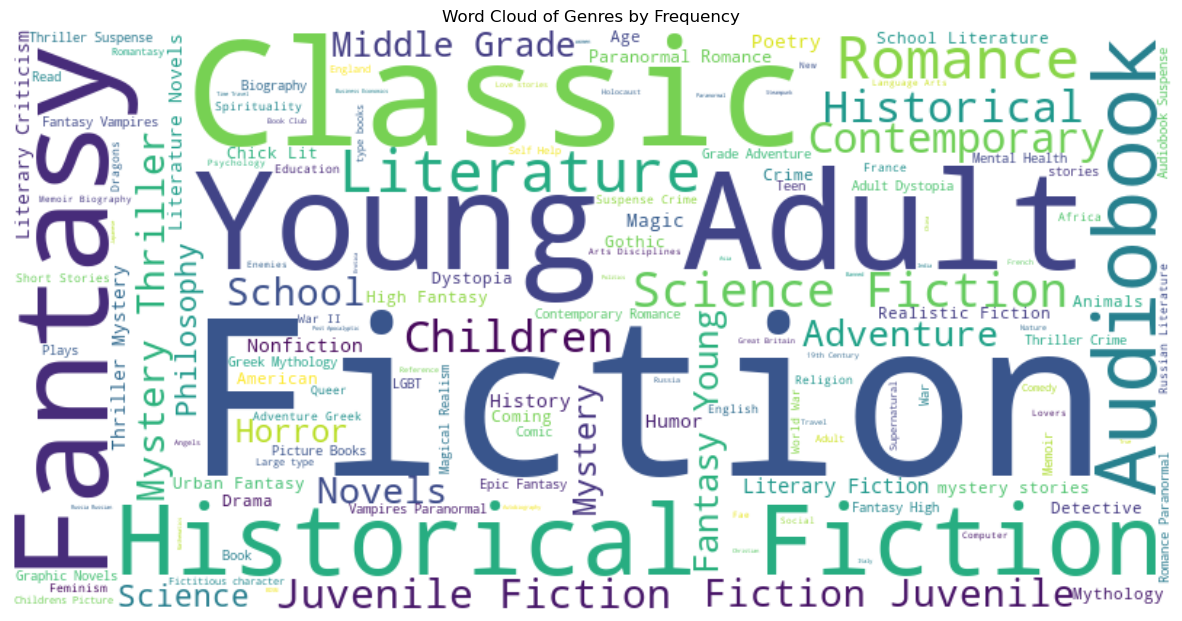

In [270]:
# Assume df is your DataFrame and it has a column 'Genre_List'
# where each entry is a list of genres, e.g., ['Fantasy', 'Adventure']

# Flatten the list of genres and join into a single string
text = " ".join([genre for genres in df['Genre_List'] for genre in genres])

# Alternatively, if your genres are stored as a comma-separated string in a column 'Genres':
# text = " ".join(df['Genres'].str.replace(",", " "))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Genres by Frequency")
plt.savefig('../Presentation/word_cloud.png', dpi=300, bbox_inches='tight')
plt.show()


/var/folders/s4/7wsslyw16w9bqtllmwg3nfbm0000gp/T/ipykernel_62329/1876180125.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_genre_exploded, x='Genre_List', y='Quality_Score', palette='Set3')


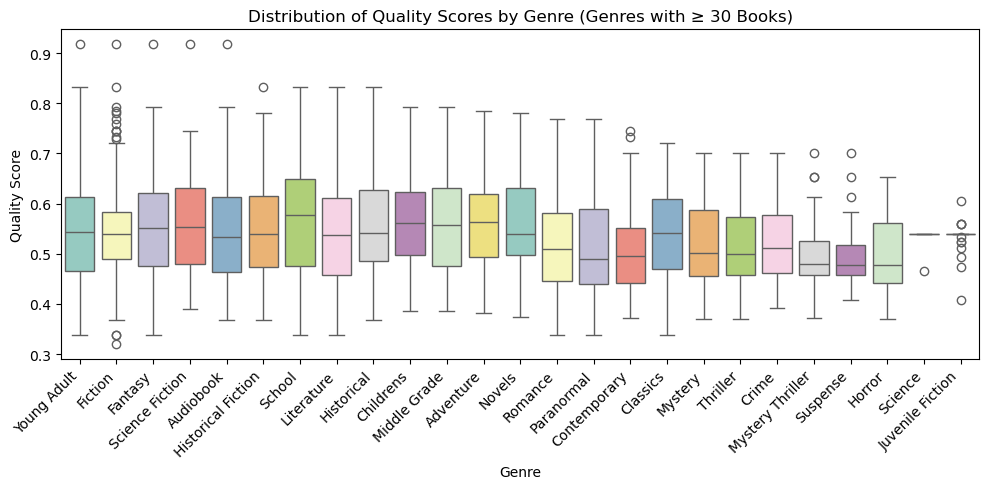

In [272]:
# Explode the Genre_List so each row represents one genre for a book
genre_exploded = df.explode('Genre_List')

# Filter out genres that appear too infrequently to keep the plots clean
min_genre_count = 30
genre_counts = genre_exploded['Genre_List'].value_counts()
common_genres = genre_counts[genre_counts >= min_genre_count].index

# Filter to only include common genres
filtered_genre_exploded = genre_exploded[genre_exploded['Genre_List'].isin(common_genres)]

# Plot boxplots of quality scores by genre
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_genre_exploded, x='Genre_List', y='Quality_Score', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Quality Scores by Genre (Genres with ≥ 30 Books)')
plt.xlabel('Genre')
plt.ylabel('Quality Score')
plt.tight_layout()
plt.savefig('../Presentation/boxplot.png', dpi=300, bbox_inches='tight')
plt.show()



/var/folders/s4/7wsslyw16w9bqtllmwg3nfbm0000gp/T/ipykernel_62329/214694280.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


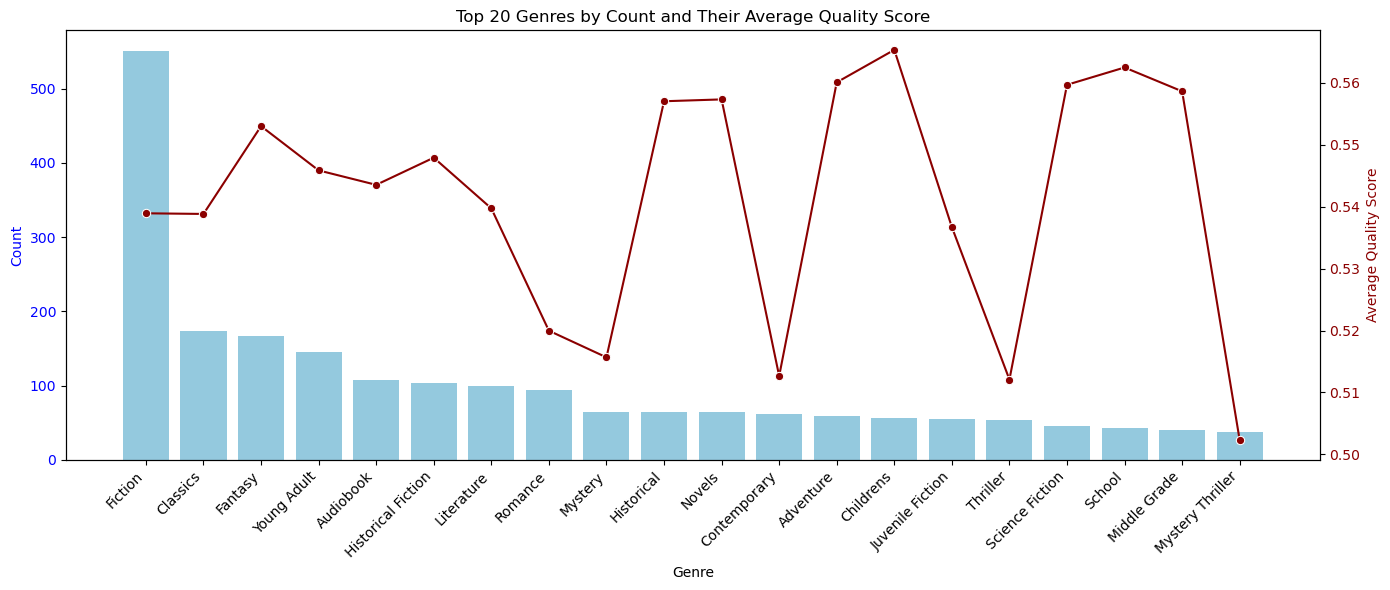

In [268]:
# Group by genre to calculate both count and average quality score
genre_stats = genre_exploded.groupby('Genre_List').agg({
    'Title': 'count',
    'Quality_Score': 'mean'
}).rename(columns={'Title': 'Count', 'Quality_Score': 'Avg_Quality_Score'})

# Select top 20 genres by count
top_genres = genre_stats.sort_values(by='Count', ascending=False).head(20)

# Plot both metrics using a twin axis chart
fig, ax1 = plt.subplots(figsize=(14, 6))

# Barplot for genre count
sns.barplot(x=top_genres.index, y=top_genres['Count'], ax=ax1, color='skyblue')
ax1.set_ylabel('Count', color='blue')
ax1.set_xlabel('Genre')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a second y-axis for average quality score
ax2 = ax1.twinx()
sns.lineplot(x=top_genres.index, y=top_genres['Avg_Quality_Score'], ax=ax2, color='darkred', marker='o')
ax2.set_ylabel('Average Quality Score', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title('Top 20 Genres by Count and Their Average Quality Score')
plt.tight_layout()
plt.savefig('../Presentation/freq_quality.png', dpi=300, bbox_inches='tight')
plt.show()


**Analysis:**
- Most common genres:
1. Fiction
2. Classics
3. Fantasy
4. Young Adult
5. Audiobook
6. Historical Fiction
7. Literature
8. Romance
9. Mystery
10. Historical

Most controversial genres:
- Romance
- Mystery
- Contemporary
- Juvenile Fiction
- Thriller
- Mystery Thriller
- Paranormal

*Contreversial - meaning mixed quality/ratings*

# Age Appropriateness of Books

In [217]:
# Define function to assign minimum age based on genre keywords


def determine_age_group(genres):
    if pd.isnull(genres):
        return 18  # Default if genres are missing
    genres = genres.lower()
    if any(keyword in genres for keyword in ['school', 'middle grade', 'young adult']):
        return 8
    elif any(keyword in genres for keyword in ['children', 'childrens', 'kids', 'juvenile']):
        return 0
    else:
        return 18  # Default for all other genres

# Apply the function to create a new numeric column
df['Age_Group_Min'] = df['Genres'].apply(determine_age_group)

# Display how many books fall into each age category
df['Age_Group_Min'].value_counts().sort_index()


Age_Group_Min
0      77
8     183
18    677
Name: count, dtype: int64

# Clustering

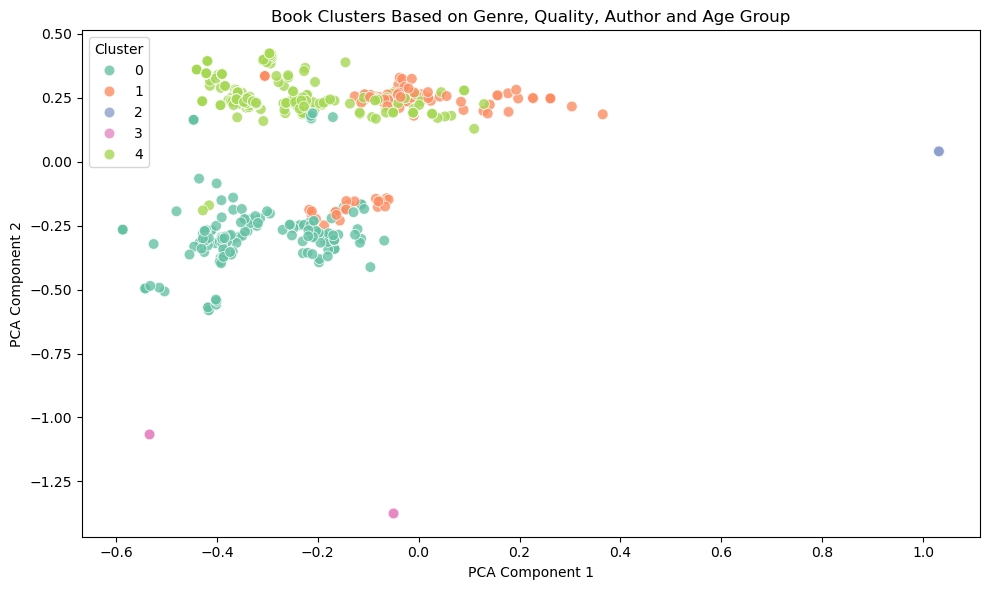

,Title,Author,Genres,Quality_Score,Age_Group_Min,Cluster
0,The Hunger Games,Suzanne Collins,"Young Adult, Fiction, Fantasy, Science Fiction...",0.917500,8,0
1,To Kill a Mockingbird,Harper Lee,"Fiction, Historical Fiction, School, Literatur...",0.832128,8,1
2,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,"Fantasy, Fiction, Young Adult, Magic, Children...",0.792507,8,0
3,Harry Potter and the Order of the Phoenix,J.K. Rowling,"Fantasy, Young Adult, Fiction, Magic, Audioboo...",0.784026,8,0
4,Pride and Prejudice,Jane Austen,"Fiction, Historical Fiction, Historical, Liter...",0.781460,18,1
...,...,...,...,...,...,...
932,Take Heart,Lisa Higdon,Fiction,0.540254,18,2
933,Sleeping Beauty and the Demon,Marina Myles,Fiction,0.540254,18,2
934,The Pleasures of Love,Jean Plaidy,Great Britain,0.540254,18,4
935,Escape to Eaglehawk,Vashti Farrer,historical fiction,0.540254,18,1


In [274]:
# --- Step 1: Prepare Features for Clustering ---

# Handle missing values
df['Genres'] = df['Genres'].fillna('')
df['Quality_Score'] = df['Quality_Score'].fillna(df['Quality_Score'].mean())
df['Age_Group_Min'] = df['Age_Group_Min'].fillna(18)
df['Author'] = df['Author'].fillna('')

# Vectorize the Genres column using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=300)
genres_tfidf = tfidf.fit_transform(df['Genres'])
author_tfidf = tfidf.fit_transform(df['Genres'])

# Normalize numeric columns
scaler = MinMaxScaler()
numeric_features = scaler.fit_transform(df[['Quality_Score', 'Age_Group_Min']])

# Combine all features into one matrix
from scipy.sparse import hstack
X = hstack([genres_tfidf, author_tfidf, numeric_features])

# --- Step 2: Apply KMeans Clustering ---
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# --- Step 3: Visualize Clusters using PCA ---
pca = PCA(n_components=2, random_state=42)
X_dense = X.toarray() if hasattr(X, "toarray") else X
X_pca = pca.fit_transform(X_dense)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2', s=60, alpha=0.8)
plt.title("Book Clusters Based on Genre, Quality, Author and Age Group")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig('../Presentation/book_clusters.png', dpi=300, bbox_inches='tight')
plt.show()


# Return clustered data for review
display(df[['Title', 'Author', 'Genres', 'Quality_Score', 'Age_Group_Min', 'Cluster']])


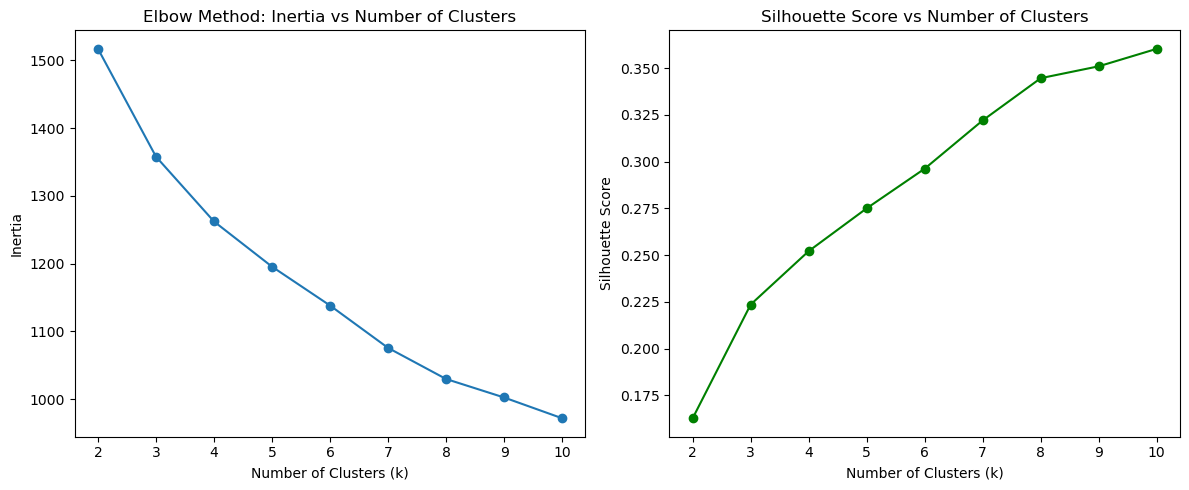

In [276]:
#Finding the optimal amount of clusters
inertia = []
silhouette = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, labels))

# Plot the elbow curve
plt.figure(figsize=(12, 5))

# Inertia plot (elbow method)
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, marker='o', color='green')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.savefig('../Presentation/silhouette_elbow.png', dpi=300, bbox_inches='tight')
plt.show()


**Analysis:**

*Elbow Method (Inertia)*

- The elbow appears around k = 4 or 5, where the curve starts to flatten.

*Silhouette Score*

- Measures how well each book fits within its cluster (higher is better).
- Peaks around k = 4 or 5, suggesting strong and distinct cluster separation at that point.

**Decision:**

*5* clusters

In [244]:
df.to_csv("../Data/Clean/Book_Recommender_Final.csv")

# Book Recommender

In [246]:
def recommend_books(book_title, num_recommendations=5):
    """
    Recommend books based on the cluster of the given book title.
    
    Args:
        book_title (str): The title of the book chosen by the user.
        num_recommendations (int): Number of books to recommend.
    
    Returns:
        DataFrame of recommended books.
    """
    # Find the cluster of the selected book
    book_cluster = df.loc[df['Title'].str.lower() == book_title.lower(), 'Cluster']
    
    if book_cluster.empty:
        return "Book not found in dataset."
    
    book_cluster = book_cluster.values[0]  # Get the cluster number

    # Find books in the same cluster (excluding the selected book)
    recommended_books = df[(df['Cluster'] == book_cluster) & (df['Title'].str.lower() != book_title.lower())]

    # Sort by Quality Score (or any other metric)
    recommended_books = recommended_books.sort_values(by='Quality_Score', ascending=False)

    # Return top recommended books
    return recommended_books[['Title', 'Author', 'Genres', 'Quality_Score']].head(num_recommendations)

# Example usage:
selected_book = "The Very Hungry Caterpillar"
recommend_books(selected_book, num_recommendations=5)


,Title,Author,Genres,Quality_Score
0,The Hunger Games,Suzanne Collins,"Young Adult, Fiction, Fantasy, Science Fiction...",0.917500
2,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,"Fantasy, Fiction, Young Adult, Magic, Children...",0.792507
3,Harry Potter and the Order of the Phoenix,J.K. Rowling,"Fantasy, Young Adult, Fiction, Magic, Audioboo...",0.784026
5,Twilight,Stephenie Meyer,"Fantasy, Young Adult, Romance, Fiction, Vampir...",0.767882
8,Divergent,Veronica Roth,"Young Adult, Dystopia, Fantasy, Fiction, Scien...",0.744827
